# Bendford's law

Bendford's law  is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small. 
In sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time.
I applied this law to an Argentinian population Dataset organized by cities in the years 2010, 2001, 1991 to check if the law is accurate. 

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

## The Benford's law diagram

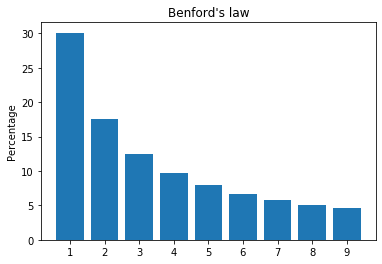

In [226]:
plt.title("Benford's law")
plt.ylabel('Percentage')
plt.bar(['1','2','3','4','5','6','7','8','9'],[30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])
plt.show()

## Argentina's population in 2010

In [204]:
population = pd.read_excel("population_by_city.xlsx")
population


,PROVINCE,CITY,POP2010,POP2001,POP1991
0,Buenos Aires,Adolfo Alsina,17072,16245.0,18077.0
1,Buenos Aires,Adolfo Gonzáles Chaves,12047,12037.0,12747.0
2,Buenos Aires,Alberti,10654,10373.0,10627.0
3,Buenos Aires,Almirante Brown,552902,515556.0,450698.0
4,Buenos Aires,Arrecifes,29044,27279.0,24593.0
...,...,...,...,...,...
2218,Tucumán,Villa de Leales,54949,2983.0,2570.0
2219,Tucumán,Villa Quinteros,63641,4647.0,3965.0
2220,Tucumán,Yánima,19002,1314.0,1171.0
2221,Tucumán,Yerba Buena,75076,50783.0,36311.0


### Select only the population in 2010

In [206]:
population2010 = population.loc[:,["POP2010"]]

In [104]:
population2010.dtypes

pob2010    int64
dtype: object

In [105]:
serie = population2010.apply(pd.Series).stack().reset_index(drop=True)
serie

0        17072
1        12047
2        10654
3       552902
4        29044
         ...  
2218     54949
2219     63641
2220     19002
2221     75076
2222     30876
Length: 2223, dtype: int64

In [106]:
type(serie)

pandas.core.series.Series

In [107]:
list_population = serie.tolist()

### Separate tha first digit and count each one

In [108]:
first_list = []
for num in list_population:
    num = str(num)
    first = num[0:1]
    first_list.append(first)


In [238]:
n1=0
n2=0
n3=0
n4=0
n5=0
n6=0
n7=0
n8=0
n9=0
n0=0

for num in first_list:
    if(num=="1"):
        n1 = n1+1
    elif(num=="2"):
        n2 = n2+1  
    elif(num=="3"):
        n3 = n3+1  
    elif(num=="4"):
        n4 = n4+1  
    elif(num=="5"):
        n5 = n5+1  
    elif(num=="6"):
        n6 = n6+1  
    elif(num=="7"):
        n7 = n7+1
    elif(num=="8"):
        n8 = n8+1
    elif(num=="9"):
        n9 = n9+1
    elif(num=="0"):
        n0 = n0+1
    else:
        pass

### Calculate the percentage of each number

In [110]:
one_percent = (n1+n2+n3+n4+n5+n6+n7+n8+n9+n0)/100

In [132]:
n1_pc = np.round(n1/one_percent,1)
print(n1_pc)

35.4


In [133]:
n2_pc = np.round(n2/one_percent,1)
print(n2_pc)

13.9


In [134]:
n3_pc = np.round(n3/one_percent,1)
print(n3_pc)

13.7


In [135]:
n4_pc = np.round(n4/one_percent,1)
print(n4_pc)

8.3


In [136]:
n5_pc = np.round(n5/one_percent,1)
print(n5_pc)

9.3


In [137]:
n6_pc = np.round(n6/one_percent,1)
print(n6_pc)

8.3


In [138]:
n7_pc = np.round(n7/one_percent,1)
print(n7_pc)

3.6


In [139]:
n8_pc = np.round(n8/one_percent,1)
print(n8_pc)

4.9


In [140]:
n9_pc = np.round(n9/one_percent,1)
print(n9_pc)

2.6


### Create a bar diagram to confronte the reality and the theory

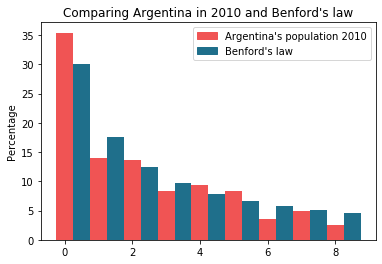

In [209]:
plt.title("Comparing Argentina in 2010 and Benford's law")
red_patch = mpatches.Patch(color="#f05454", label="Argentina's population 2010")
blue_patch = mpatches.Patch(color="#1f6f8b", label="Benford's law")
plt.legend(handles=[red_patch, blue_patch])
plt.ylabel("Percentage")
# plt.xlabel('1','2','3','4','5','6','7','8','9')
data = [[n1_pc, n2_pc, n3_pc, n4_pc, n5_pc, n6_pc, n7_pc, n8_pc, n9_pc], [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]]
x = np.arange(9)
plt.bar(x + 0.00, data[0], color="#f05454", width = 0.5)
plt.bar(x + 0.5, data[1], color="#1f6f8b", width = 0.5)
plt.show()

In [240]:
pc1 = round((((n1_pc/30.1)*100)-100),2)
pc2 = round((((n2_pc/17.6)*100)-100),2)
pc3 = round((((n3_pc/12.5)*100)-100),2)
pc4 = round((((n4_pc/9.7)*100)-100),2)
pc5 = round((((n5_pc/7.9)*100)-100),2)
pc6 = round((((n6_pc/6.7)*100)-100),2)
pc7 = round((((n7_pc/5.8)*100)-100),2)
pc8 = round((((n8_pc/5.1)*100)-100),2)
pc9 = round((((n9_pc/4.6)*100)-100),2)
pctotal = pc1+pc2+pc3+pc4+pc5+pc6+pc7+pc8+pc9
accuracy = np.round((pctotal/9),2) 
print("Accuracy: " + str(accuracy) + "%")

Accuracy: -5.77%


## Argentina's population in 2001

In [241]:
population2001 = population.loc[:,["POP2001"]]

serie2001 = population2001.apply(pd.Series).stack().reset_index(drop=True)

list_population2001 = serie2001.tolist()

first_list2001 = []

for num in list_population2001:
    num = str(num)
    first = num[0:1]
    first_list2001.append(first)

n101=0
n201=0
n301=0
n401=0
n501=0
n601=0
n701=0
n801=0
n901=0
n001=0

for num in first_list2001:
    if(num=="1"):
        n101 = n101+1
    elif(num=="2"):
        n201 = n201+1  
    elif(num=="3"):
        n301 = n301+1  
    elif(num=="4"):
        n401 = n401+1  
    elif(num=="5"):
        n501 = n501+1  
    elif(num=="6"):
        n601 = n601+1  
    elif(num=="7"):
        n701 = n701+1
    elif(num=="8"):
        n801 = n801+1
    elif(num=="9"):
        n901 = n901+1
    elif(num=="0"):
        n001 = n001+1
    else:
        pass
    
one_percent2001 = (n101+n201+n301+n401+n501+n601+n701+n801+n901+n001)/100

n101_pc = np.round(n101/one_percent2001,1)
n201_pc = np.round(n201/one_percent2001,1)
n301_pc = np.round(n301/one_percent2001,1)
n401_pc = np.round(n401/one_percent2001,1)
n501_pc = np.round(n501/one_percent2001,1)
n601_pc = np.round(n601/one_percent2001,1)
n701_pc = np.round(n701/one_percent2001,1)
n801_pc = np.round(n801/one_percent2001,1)
n901_pc = np.round(n901/one_percent2001,1)

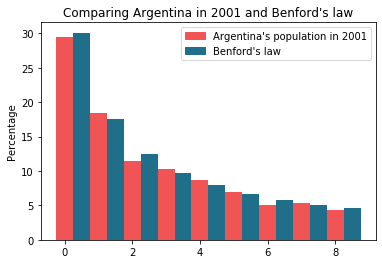

In [236]:
plt.title("Comparing Argentina in 2001 and Benford's law")
red_patch = mpatches.Patch(color="#f05454", label="Argentina's population in 2001")
blue_patch = mpatches.Patch(color="#1f6f8b", label="Benford's law")
plt.legend(handles=[red_patch, blue_patch])
plt.ylabel("Percentage")
# plt.xlabel('1','2','3','4','5','6','7','8','9')
data = [[n101_pc, n201_pc, n301_pc, n401_pc, n501_pc, n601_pc, n701_pc, n801_pc, n901_pc], [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]]
x = np.arange(9)
plt.bar(x + 0.00, data[0], color="#f05454", width = 0.5)
plt.bar(x + 0.5, data[1], color="#1f6f8b", width = 0.5)
plt.show()

In [242]:
pc1 = round((((n101_pc/30.1)*100)-100),2)
pc2 = round((((n201_pc/17.6)*100)-100),2)
pc3 = round((((n301_pc/12.5)*100)-100),2)
pc4 = round((((n401_pc/9.7)*100)-100),2)
pc5 = round((((n501_pc/7.9)*100)-100),2)
pc6 = round((((n601_pc/6.7)*100)-100),2)
pc7 = round((((n701_pc/5.8)*100)-100),2)
pc8 = round((((n801_pc/5.1)*100)-100),2)
pc9 = round((((n901_pc/4.6)*100)-100),2)
pctotal = pc1+pc2+pc3+pc4+pc5+pc6+pc7+pc8+pc9
accuracy = np.round((pctotal/9),2) 
print("Accuracy: " + str(accuracy) + "%")

Accuracy: -0.12%


## Argentina's population in 1991

In [235]:
population1991 = population.loc[:,["POP1991"]]

serie1991 = population1991.apply(pd.Series).stack().reset_index(drop=True)

list_population1991 = serie1991.tolist()

first_list1991 = []

for num in list_population1991:
    num = str(num)
    first = num[0:1]
    first_list1991.append(first)

n191=0
n291=0
n391=0
n491=0
n591=0
n691=0
n791=0
n891=0
n991=0
n091=0

for num in first_list1991:
    if(num=="1"):
        n191 = n191+1
    elif(num=="2"):
        n291 = n291+1  
    elif(num=="3"):
        n391 = n391+1  
    elif(num=="4"):
        n491 = n491+1  
    elif(num=="5"):
        n591 = n591+1  
    elif(num=="6"):
        n691 = n691+1  
    elif(num=="7"):
        n791 = n791+1
    elif(num=="8"):
        n891 = n891+1
    elif(num=="9"):
        n991 = n991+1
    elif(num=="0"):
        n091 = n091+1
    else:
        pass
    
one_percent1991 = (n101+n201+n301+n401+n501+n601+n701+n801+n901+n001)/100

n191_pc = np.round(n191/one_percent1991,1)
n291_pc = np.round(n291/one_percent1991,1)
n391_pc = np.round(n391/one_percent1991,1)
n491_pc = np.round(n491/one_percent1991,1)
n591_pc = np.round(n591/one_percent1991,1)
n691_pc = np.round(n691/one_percent1991,1)
n791_pc = np.round(n791/one_percent1991,1)
n891_pc = np.round(n891/one_percent1991,1)
n991_pc = np.round(n991/one_percent1991,1)

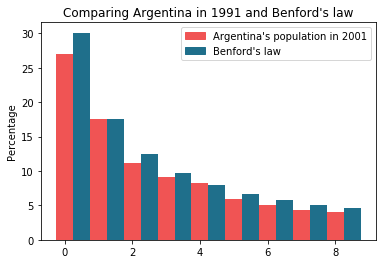

In [234]:
plt.title("Comparing Argentina in 1991 and Benford's law")
red_patch = mpatches.Patch(color="#f05454", label="Argentina's population in 2001")
blue_patch = mpatches.Patch(color="#1f6f8b", label="Benford's law")
plt.legend(handles=[red_patch, blue_patch])
plt.ylabel("Percentage")
# plt.xlabel('1','2','3','4','5','6','7','8','9')
data = [[n191_pc, n291_pc, n391_pc, n491_pc, n591_pc, n691_pc, n791_pc, n891_pc, n991_pc], [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]]
x = np.arange(9)
plt.bar(x + 0.00, data[0], color="#f05454", width = 0.5)
plt.bar(x + 0.5, data[1], color="#1f6f8b", width = 0.5)
plt.show()

In [243]:
pc1 = round((((n191_pc/30.1)*100)-100),2)
pc2 = round((((n291_pc/17.6)*100)-100),2)
pc3 = round((((n391_pc/12.5)*100)-100),2)
pc4 = round((((n491_pc/9.7)*100)-100),2)
pc5 = round((((n591_pc/7.9)*100)-100),2)
pc6 = round((((n691_pc/6.7)*100)-100),2)
pc7 = round((((n791_pc/5.8)*100)-100),2)
pc8 = round((((n891_pc/5.1)*100)-100),2)
pc9 = round((((n991_pc/4.6)*100)-100),2)
pctotal = pc1+pc2+pc3+pc4+pc5+pc6+pc7+pc8+pc9
accuracy = np.round((pctotal/9),2) 
print("Accuracy: " + str(accuracy) + "%")

Accuracy: -7.95%


## 3-yars average

Calculate the average population of the 3 years (1991, 2001, and 2010) and notice how the error is smaller and nearest the Bendford model.

In [223]:
n1ave= np.round(((n1_pc+n101_pc+n191_pc)/3),2)
n2ave= np.round(((n2_pc+n201_pc+n291_pc)/3),2)
n3ave= np.round(((n3_pc+n301_pc+n391_pc)/3),2)
n4ave= np.round(((n4_pc+n401_pc+n491_pc)/3),2)
n5ave= np.round(((n5_pc+n501_pc+n591_pc)/3),2)
n6ave= np.round(((n6_pc+n601_pc+n691_pc)/3),2)
n7ave= np.round(((n7_pc+n701_pc+n791_pc)/3),2)
n8ave= np.round(((n8_pc+n801_pc+n891_pc)/3),2)
n9ave= np.round(((n9_pc+n901_pc+n991_pc)/3),2)

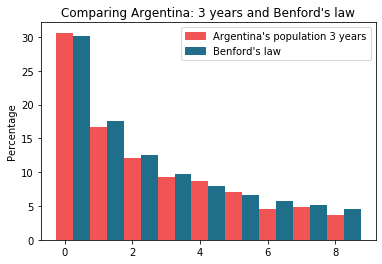

In [233]:
plt.title("Comparing Argentina: 3 years and Benford's law")
red_patch = mpatches.Patch(color="#f05454", label="Argentina's population 3 years")
blue_patch = mpatches.Patch(color="#1f6f8b", label="Benford's law")
plt.legend(handles=[red_patch, blue_patch])
plt.ylabel("Percentage")
data = [[n1ave, n2ave, n3ave, n4ave, n5ave, n6ave, n7ave, n8ave, n9ave], [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]]
x = np.arange(9)
plt.bar(x + 0.00, data[0], color="#f05454", width = 0.5)
plt.bar(x + 0.5, data[1], color="#1f6f8b", width = 0.5)
plt.show()

In [190]:
benford_list = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
benford_tot =sum(benford_list)
benford_tot
average_list = [n1ave, n2ave, n3ave, n4ave, n5ave, n6ave, n7ave, n8ave, n9ave]

100.0

In [232]:
pc1 = round((((n1ave/30.1)*100)-100),2)
pc2 = round((((n2ave/17.6)*100)-100),2)
pc3 = round((((n3ave/12.5)*100)-100),2)
pc4 = round((((n4ave/9.7)*100)-100),2)
pc5 = round((((n5ave/7.9)*100)-100),2)
pc6 = round((((n6ave/6.7)*100)-100),2)
pc7 = round((((n7ave/5.8)*100)-100),2)
pc8 = round((((n8ave/5.1)*100)-100),2)
pc9 = round((((n9ave/4.6)*100)-100),2)
pctotal = pc1+pc2+pc3+pc4+pc5+pc6+pc7+pc8+pc9
accuracy = np.round((pctotal/9),2) 
print("Accuracy: " + str(accuracy) + "%")

Accuracy: -4.6%


## Conclusions

This study project shows how Benford's law is accurate, the best score in the 2001 with an an error -0.12%.
I practiced the use of the libraries numpy, pandas and matplotlib and how to manipulate data type objects and series and how to create a bar diagram with details.